In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

11025


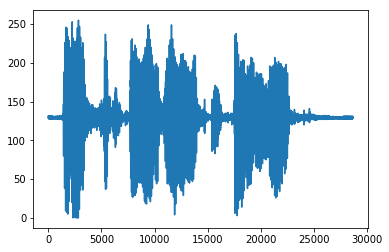

In [14]:
rate, s = wavfile.read('marySixteen.wav')
plt.plot(s);
print(rate)
IPython.display.Audio(s, rate=rate)

In [9]:
pwd

'C:\\Users\\ANSHUL YADAV\\Documents'

255


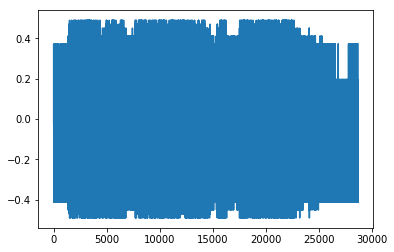

In [19]:
# the analog signal is simply rescaled between -100 and +100
# largest element in magnitude:
norm = 1.0 / max(np.absolute([min(s), max(s)]))
print(max(s))
sA = 100.0 * s * norm

# the digital version is clamped to the integers
sD = np.round(sA)
plt.plot(sA-sD)



In [20]:
# we will be computing SNRs later as well, so let's define a function
def SNR(noisy, original):
    # power of the error
    err = np.linalg.norm(original-noisy)
    # power of the signal
    sig = np.linalg.norm(original)
    # SNR in dBs
    return 10 * np.log10(sig/err)
    
    
print ('SNR = %f dB' % SNR(sD, sA))

SNR = 22.610268 dB


In [21]:
IPython.display.Audio(sA, rate=rate)

In [22]:
IPython.display.Audio(sD, rate=rate)

In [23]:
def repeater(x, noise_amplitude, attenuation):
    # first, create the noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    # attenuation
    x = x * attenuation
    # noise
    x = x + noise
    # gain compensation
    return x / attenuation

In [24]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

In [27]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

In [28]:
NUM_REPEATERS = 70
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))    

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))  

Analog trasmission: SNR = 14.274716 dB
Digital trasmission: SNR = 22.610268 dB


In [29]:
IPython.display.Audio(yD, rate=rate)

In [30]:
IPython.display.Audio(yA, rate=rate)

In [31]:
NOISE_AMPLITUDE = 0.3

yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))   

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))

Analog trasmission: SNR = 12.523043 dB
Digital trasmission: SNR = 11.780455 dB


In [32]:
IPython.display.Audio(yD, rate=rate)